<a href="https://colab.research.google.com/github/PrincetonUniversity/intro_machine_learning/blob/main/day1/ML_overview_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import seaborn as sns
import pandas as pd

# Configure plotting
rc('animation', html='jshtml')
qualitative_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a'] # four color-blind friendly qualitative colors, and black


# Set the random seed
rng = np.random.RandomState(1)

# Linear Regression

## Load Some Example Data



In [2]:
from sklearn.datasets import load_diabetes

In [3]:
# Make the data set.
diabetes_bunch = load_diabetes()

print(diabetes_bunch.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabetes_X = diabetes_bunch.data
diabetes_y = diabetes_bunch.target

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print(diabetes_X_train.shape, diabetes_X_test.shape)
print(diabetes_y_train.shape, diabetes_y_test.shape)

(422, 1) (20, 1)
(422,) (20,)


Text(0, 0.5, 'quantitative measure of diabetes progression')

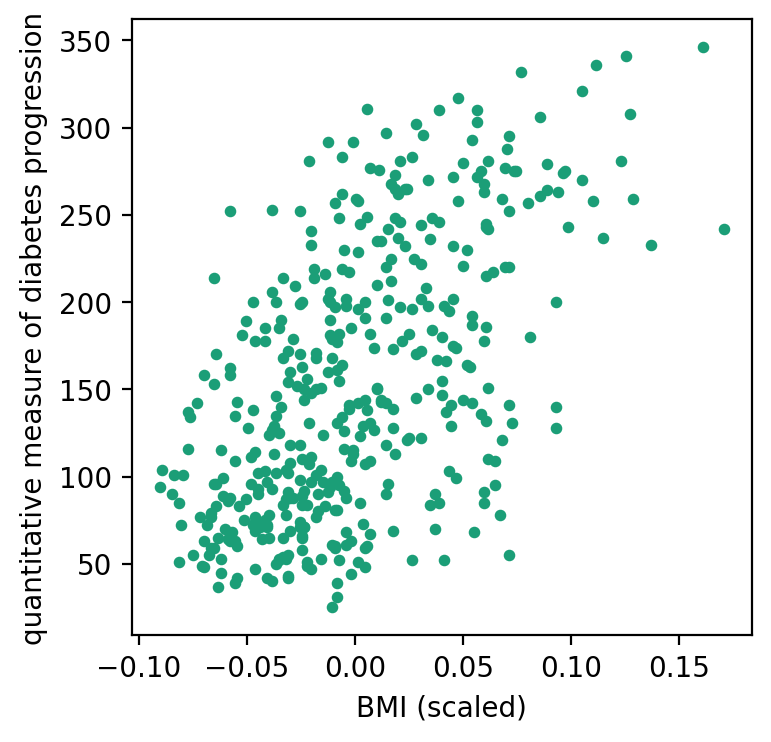

In [5]:
# Plot the data set.

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, color=qualitative_colors[0], s=10)
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')

## Linear Regression


#### A straight line with input $x$ and output $y$ has the form $y = w_1 x + w_0$, where $w_0$ and $w_1$ are coefficients we aim to learn.

#### We use the letter $w$ because we think of the coefficients as **weights**; the value of $y$ is changed by changing the relative weight of one term or another.

#### The task of finding the function that best fits the training set of $n$ points in the $x$, $y$ plane is called **linear regression**.

#### To fit the line to the data, all we have to do is find the values of the weights ($w_0 , w_1$) that minimize the *loss*.

#### One way is to use the squared-error loss function:

\begin{align}
\mathcal{L}(w_0, w_1)
  &= \sum_{i=1}^N (y_i - \hat{y}_i)^2 \\
  &= \sum_{i=1}^{N} (y_i - (w_1 x_i + w_0))^2
\end{align}



In [6]:
def squarederror_loss(xs, ys, w0, w1):
  """Caculate the squared-error loss
    Parameters
    ----------
    xs : array_like
        x-axis values of data points, shape (number of data points)
    ys : array_like
        y-axis values of data points, shape (number of data points)
    w0 : array_like
        weight for intercept, shape (number of weights)
    w1 : array_like
        weight for slope, shape (number of weights)
    Returns
    -----------
    loss : array_like
        squared-error loss, shape (number of weights)
    """
  xs = np.asarray(xs).flatten()
  ys = np.asarray(ys).flatten()
  loss = np.sum((ys[:,np.newaxis] - (w1[np.newaxis,:]*xs[:,np.newaxis] + w0[np.newaxis,:]))**2.,axis=0)
  return loss

#### The squared-error loss function is minimized when the partial derivatives with respect to $ w_0 $ and $w_1 $ are zero:

$$\frac{\partial}{\partial w_0} \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2 = 0 $$

$$ \frac{\partial}{\partial w_1} \sum_{j=1}^{n} (y_j - (w_1 x_j + w_0))^2 = 0$$

#### This has unique solutions:

\begin{align}
w_0 &= \frac{1}{N} \sum_{i=1}^N y_i - \frac{w_1}{N} \sum_{i=1}^N x_i \\
&= \bar{y} - w_1 \bar{x}
\end{align}

\begin{align}
w_1 &= \frac{\frac{1}{N} (\sum_{i=1}^N x_i y_i) - \bar{x} \bar{y}}{\frac{1}{N}(\sum_{i=1}^N x^2_i) - \bar{x}^2}
\end{align}

In [7]:
def univariate_linear_regression(xs, ys):
  """Calculate optimal weights in the univariate linear regression case.
    Parameters
    ----------
    xs : array_like
        x-axis values of data points, shape (number of data points)
    ys : array_like
        y-axis values of data points, shape (number of data points)
    Returns
    -----------
    w0 : float
        weight for intercept
    w1 : float
        weight for slope
    """
  xs = np.asarray(xs).flatten()
  ys = np.asarray(ys).flatten()
  N = float(xs.shape[0])
  w1 = (np.sum(xs*ys)/N - np.mean(xs)*np.mean(ys) ) / ( np.sum(xs**2.)/N - np.mean(xs)**2.)
  w0 = (np.mean(ys) - w1*np.mean(xs))
  return w0, w1

In [8]:
w0, w1 = univariate_linear_regression(diabetes_X_train, diabetes_y_train)
print(w0, w1)

152.91886182616113 938.237861251352


Text(0, 0.5, 'quantitative measure of diabetes progression')

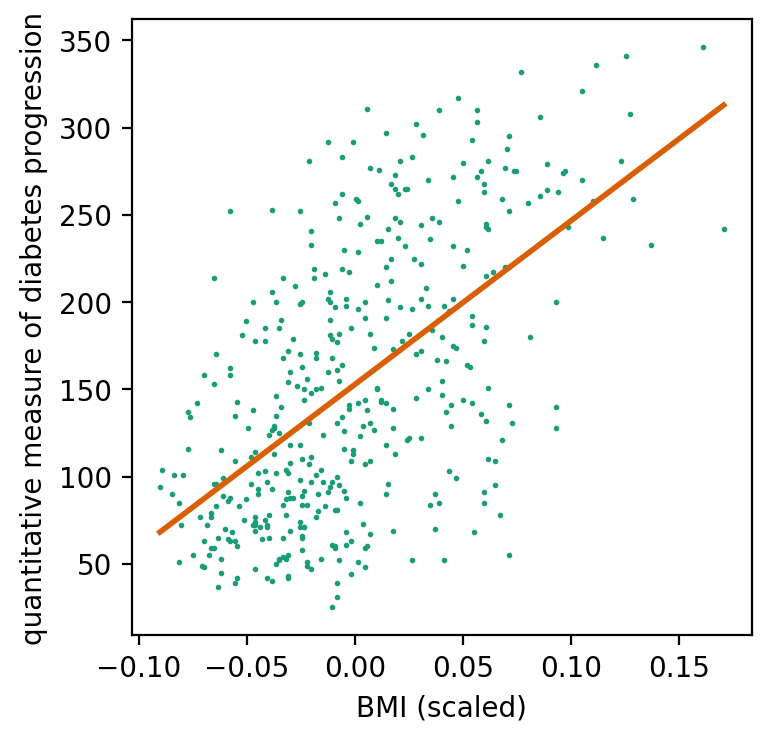

In [9]:
# Plot the data set with the linear regression fit.

plot_xs = np.linspace(diabetes_X_train.min(), diabetes_X_train.max(), 101)

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(diabetes_X_train, diabetes_y_train, s=1, color=qualitative_colors[0])
axs.plot(plot_xs, w1*plot_xs + w0, color=qualitative_colors[1], linewidth=2)
axs.set_xlabel('BMI (scaled)')
axs.set_ylabel('quantitative measure of diabetes progression')

#### We don't have to just use this optimal weight value, we can explore the weight space.

#### We'll use the *squarederror_loss* function we defined earlier to calcule the loss over a wide range of $w_0$ and $w1$ values.

In [10]:
# Define a range of w0 and w1 values to calculate.
grid_dim = 200
w0_range = np.linspace(w0 - grid_dim, w0 + grid_dim, 200)
w1_range = np.linspace(w1 - grid_dim, w1 + grid_dim, 200)

# Make a 200 x 200 grids of w0 and w1 values over that range.
XX, YY = np.meshgrid(w0_range, w1_range)

# Flatten the grids to lists with 40000 values.
XY = np.c_[XX.ravel(), YY.ravel()]

In [11]:
# Calculate the squared-error loss for each pair of w0, w1 values.
Z = squarederror_loss(diabetes_X_train, diabetes_y_train, XY[:,0], XY[:,1])

# Turn the list of loss values into a 200 x 200 grid.
Z = Z.reshape(XX.shape)

# Also calculate the loss for the optimal w0, w1 values we found earlier.
best_fit_loss = squarederror_loss(diabetes_X_train, diabetes_y_train, np.array([w0]), np.array([w1]))

[1669018.37813539]


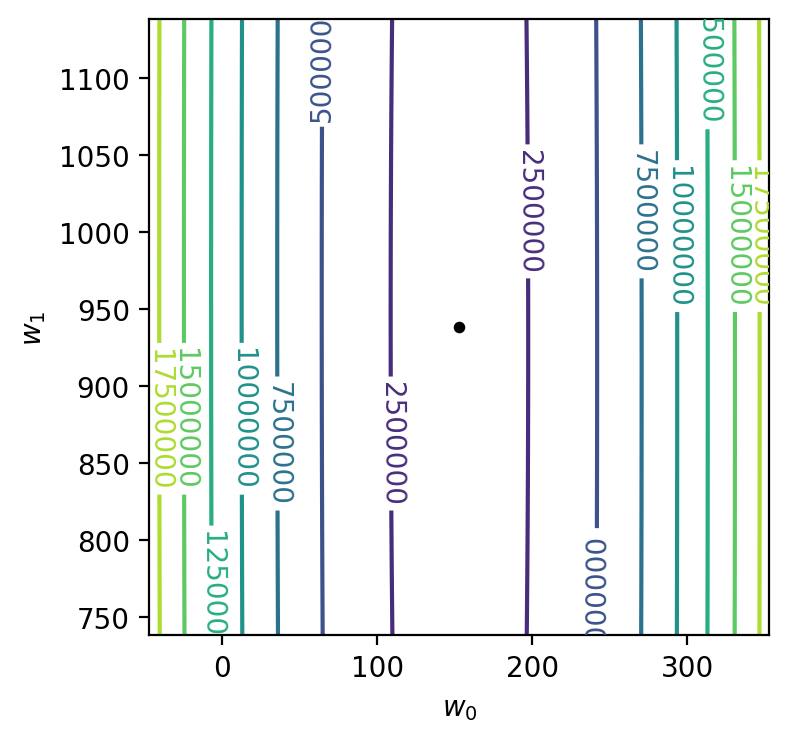

In [12]:
# Plot the squared-error loss values.

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200, sharex=True)
CS = axs.contour(XX, YY, Z)
axs.clabel(CS, inline=True, fontsize=10, fmt='%d')
axs.scatter(w0, w1, s=10, color='k')
axs.set_ylabel(r'$w_1$')
axs.set_xlabel(r'$w_0$')

print(best_fit_loss)

#### This is an ideal case, where it is easy to find an optimal solution where the partial derivatives are zero.

#### What are other methods for minimizing loss that does not depend  on solving partial derivatives and can be applied to any loss function?

#### We can search through a continuous weight space looking for the minimum, using a technique called *gradient descent*.

## Gradient Descent

### Step 0

#### Choose a starting point in the weight space - an initial value of $w_0$ and $w_1$.

#### A simple method to do this is to randomly choose a point, but this could be very far from the optimal position.

#### Usually you'll have some intuition about your data and will choose several values close to what you expect and rerun the procedure to see if you get the same answer.

In [13]:
w0_init, w1_init = w0-10., w1-10.

### Step 1

#### Compute an estimate of the gradient at this point.

#### For the univariate case:

\begin{align}
\frac{\partial}{\partial w_0} \sum_{i=1}^{n} (y_i - (w_1 x_i + w_0))^2 &= -2 \sum_{i=1}^{n}(y_i - (w_1 x_i + w_0)) \\
\frac{\partial}{\partial w_1} \sum_{i=1}^{n} (y_j - (w_1 x_i + w_0))^2 &= -2 \sum_{i=1}^{n}(y_j - (w_1 x_i + w_0)) x_i
\end{align}



In [14]:
def gradient_of_weights(xs, ys, w0, w1):
  """Calculate the partial derivative of the loss function with respect to the weights.
  Parameters
  ----------
  xs : array_like
      x-axis values of data points, shape (number of data points)
  ys : array_like
      y-axis values of data points, shape (number of data points)
  w0 : float
    weight for intercept
  w1 : float
      weight for slope
  Returns
  -----------
  derivative_w0 : float
      partial derivative of the loss function with respect to theweight for slope
  derivative_w1 : float
      partial derivative of the loss function with respect to the weight for slope
  """

  derivative_w0 = np.sum((ys - (w1*xs + w0)) )
  derivative_w1 = np.sum((ys - (w1_init*xs + w0_init))*xs)

  return derivative_w0, derivative_w1

### Step 2

#### Move a small amount from the initial value in the steepest downhill direction.

#### We specfic the *small amount* to move as $\alpha$. This is often called the *learning rate* or *step size*.

#### The initial $w_0$ and $w_1$ are updated in the following way:

\begin{align}
w_0 &← w_0 + \alpha \sum_{i=1}^{n}(y_j - (w_1 x_i + w_0)) \\
w_1 &← w_1 + \alpha \sum_{i=1}^{n}(y_j - (w_1 x_i + w_0)) x_i
\end{align}


In [15]:
def update_weights(xs, ys, w0_old, w1_old, step_size):
  """ Update the weights using the partial derivate and step size.
  Parameters
  ----------
  xs : array_like
      x-axis values of data points, shape (number of data points)
  ys : array_like
      y-axis values of data points, shape (number of data points)
  w0_old : float
    weight for intercept
  w1_old : float
      weight for slope
  Returns
  -----------
  w0_new: float
    weight for intercept
  w1_new : float
    weight for slope
  """
  xs = np.asarray(xs).flatten()
  ys = np.asarray(ys).flatten()
  w0_new = w0_old + step_size*np.sum((ys - (w1_old*xs + w0_old)) )
  w1_new = w1_old + step_size*np.sum((ys - (w1_old*xs + w0_old))*xs)
  return w0_new, w1_new

### Repeat Steps 1 - 2

### until difference between the old and the new weights is sufficiently small.

In [16]:
def univariate_gradient_decent(xs, ys, w0_init, w1_init, step_size = 0.001, sufficiently_small = 0.00001):
  """ Update the weights using the partial derivate and step size.
  Parameters
  ----------
  xs : array_like
      x-axis values of data points, shape (number of data points)
  ys : array_like
      y-axis values of data points, shape (number of data points)
  w0_init : float
    initial guess of weight for intercept
  w1_init : float
    initial guess of weight for slope
  Returns
  -----------
  w0s: array_like
    list of weights for intercept
  w1s : array_like
    list of weights for slope
  """
  w0_firststep, w1_firststep = update_weights(xs, ys, w0_init, w1_init, step_size)

  w0s = np.array( [w0_init, w0_firststep] )
  w1s = np.array( [w1_init, w1_firststep] )

  while np.any([np.abs(w0s[-2]-w0s[-1]) > sufficiently_small, np.abs(w1s[-2]-w1s[-1]) > sufficiently_small]):
    w0_nextstep, w1_nextstep = update_weights(xs, ys, w0s[-1], w1s[-1], step_size)
    w0s = np.append(w0s, w0_nextstep)
    w1s = np.append(w1s, w1_nextstep)
  return w0s, w1s

In [17]:
print(w0, w1)
print(w0_init, w1_init)
print(update_weights(diabetes_X_train, diabetes_y_train, w0_init, w1_init, step_size = 0.001))

152.91886182616113 938.237861251352
142.91886182616113 928.237861251352
(147.14085748544002, 928.2494146922327)


In [18]:
weights_to_plot0, weights_to_plot1 = univariate_gradient_decent(diabetes_X_train, diabetes_y_train, w0_init, w1_init, sufficiently_small=1e-8)

(918.237861251352, 958.237861251352)

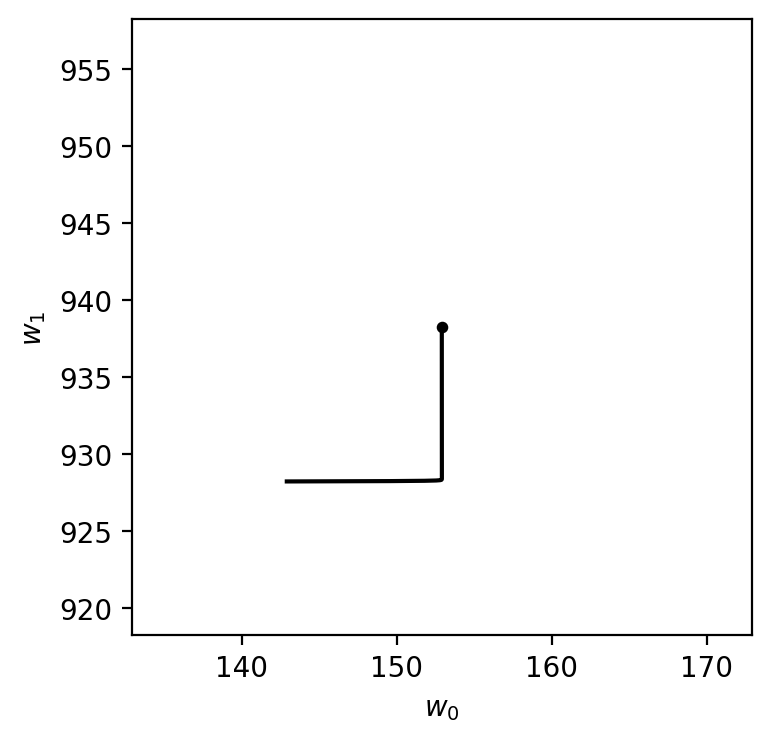

In [19]:
# Plot the squared-error loss values.
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200, sharex=True)
CS = axs.contour(XX, YY, Z)
axs.clabel(CS, inline=True, fontsize=10, fmt='%d')
axs.plot(weights_to_plot0, weights_to_plot1, '-', color='k')
axs.scatter(w0, w1, s=10, color='k')
axs.set_ylabel(r'$w_1$')
axs.set_xlabel(r'$w_0$')
axs.set_xlim(w0-20., w0+20.)
axs.set_ylim(w1-20., w1+20.)

#### This is a very simple example, in just two dimensions, but it can extend to many dimensions.

In [20]:
# Load the full diabetes dataset
diabetes_dataset = load_diabetes(as_frame=True)

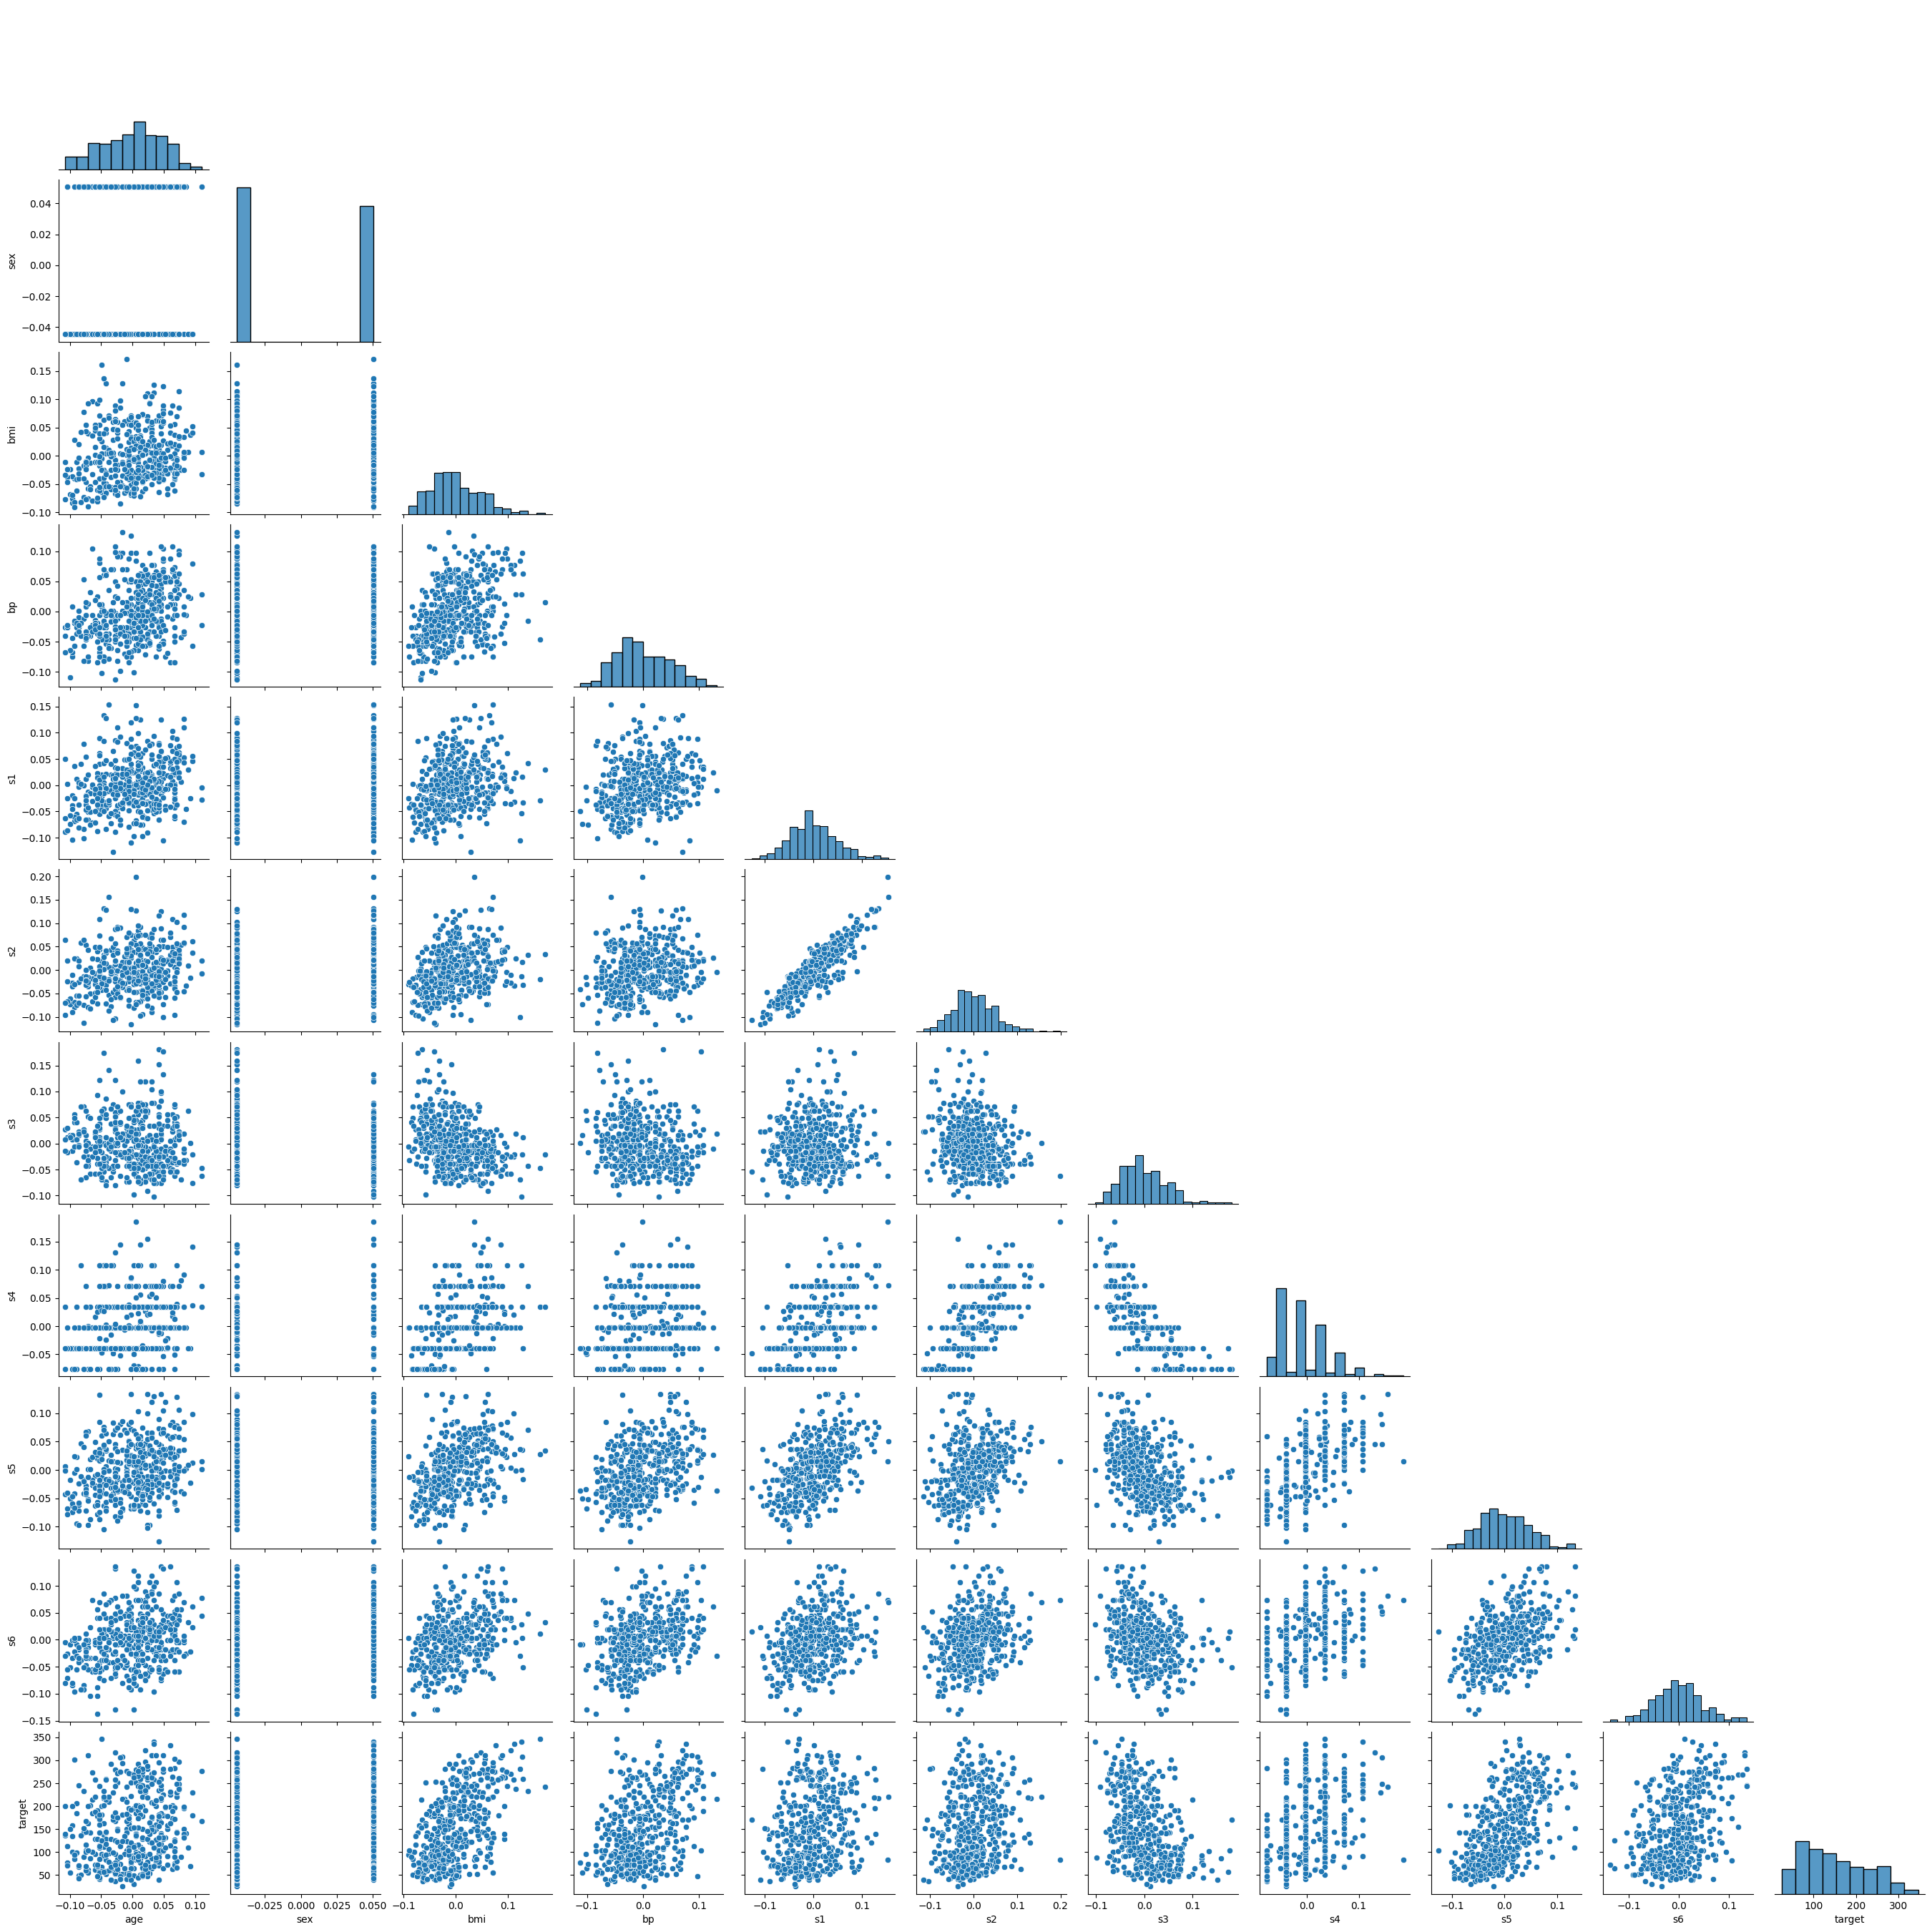

In [21]:
sns.pairplot(diabetes_dataset.frame, corner=True)

In [22]:
features = diabetes_dataset.data
print(features.columns)
features = features.drop(columns=['sex'])
print(features.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [23]:
from sklearn import linear_model

In [24]:
reg = linear_model.LinearRegression()
reg.fit(features, diabetes_dataset.target)
print(reg.coef_)
print(reg.intercept_)

[ -33.17655557  557.06057374  276.08163793 -712.80368975  420.56485548
  139.51079371  126.28020632  756.36625515   48.91841452]
152.133484162896


In [25]:
reg = linear_model.SGDRegressor(loss='squared_error', max_iter=10000)
reg.fit(features, diabetes_dataset.target)
print(reg.coef_)
print(reg.intercept_)

[  10.73573954  443.10547571  266.39791517  -18.36746103  -84.9491512
 -177.81399706  118.37397949  366.06251388  123.59291261]
[152.10704649]


# Linear Classification

## Load Some Example Data

In [26]:
from sklearn.datasets import make_classification

In [27]:
# Make the data set.
X, labels = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1, class_sep=3.)
X += 2 * rng.uniform(size=X.shape)

Text(0, 0.5, '$x_2$')

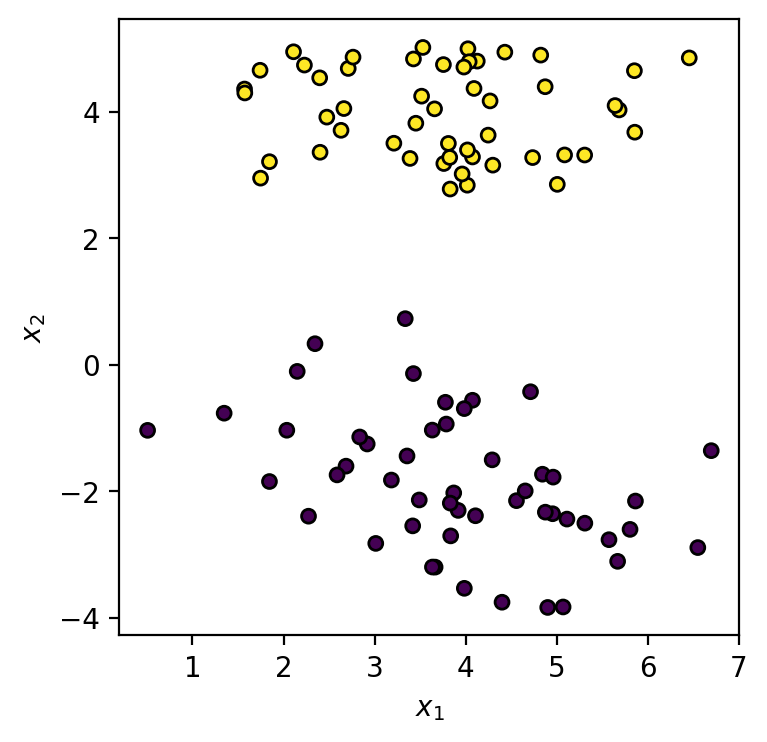

In [28]:
# Plot the data set.
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

## Decision Boundary


#### A *decision boundary* is a line (or a hyperplane in more than two dimensions) that separates two classes.
#### Linearly separable data can be divided using a linear decision boundary:

## $ x_2 - (w_1 x_1 + w_0) = 0 $

#### The yellow points, which we want to classify with value 1, are above this line; they are points for which:
## $ x_2 - (w_1 x_1 + w_0) > 0 $,
#### while the purple points, which we want to classify with value 0, are
## $ x_2 - (w_1 x_1 + w_0) < 0 $.

Text(0, 0.5, '$x_2$')

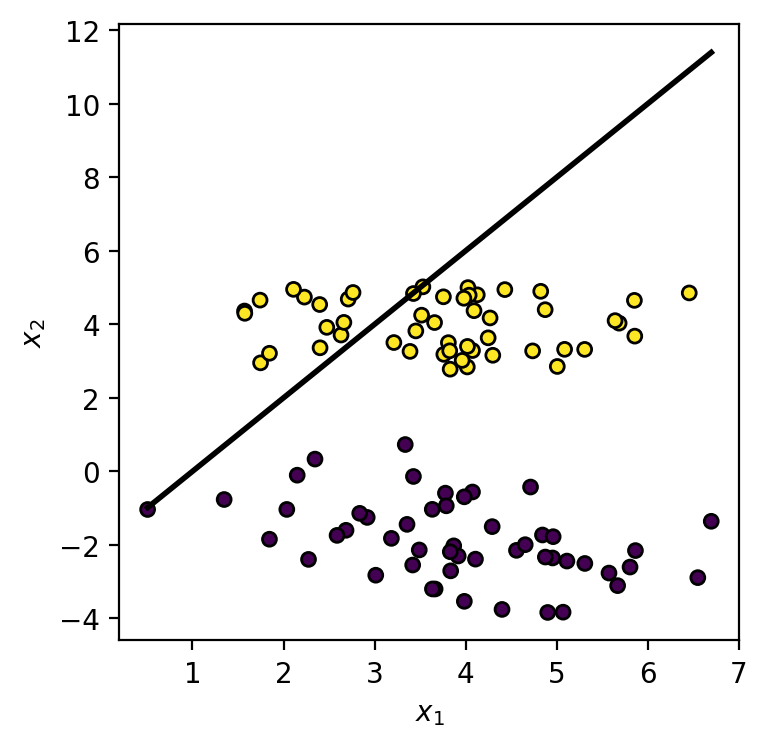

In [29]:
# Plot the data set and inital decision boundary guess.

plot_xs = np.linspace(X[:, 0].min(), X[:, 0].max(), 101)

w0_init, w1_init = -2., 2.

fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
axs.plot(plot_xs, w1_init*plot_xs + w0_init, color='k', linewidth=2)
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

#### Define a function that predicts the class based on the point's position relative to the decision boundary.

In [30]:
def predict_class(x1s, x2s, w0, w1):
  """ Predict the class of each point.
  Parameters
  ----------
  x1s : array_like
      x-axis values of data points, shape (number of data points)
  x2s : array_like
      y-axis values of data points, shape (number of data points)
  w0 : float
    weight for intercept
  w1 : float
    weight for slope
  Returns
  -----------
  prediction: array_like
    list of predicted classes
  """
  prediction = np.asarray((x2s - (w1*x1s + w0)) > 0, dtype=int)
  return prediction

In [31]:
predictions = predict_class(X[:, 0], X[:, 1], w0_init, w1_init)
print(predictions)
print(predictions == labels)
print(f"{np.sum(predictions == labels)} correct out of {labels.shape[0]} total")
print(f"{np.sum(predictions == labels) / labels.shape[0] * 100 :0.1f}% accuracy")

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]
[ True  True False False False  True  True False  True False False  True
 False  True  True  True False  True False  True  True False  True False
 False  True  True  True  True  True  True False  True  True  True  True
  True  True  True False  True False  True  True  True False False  True
 False  True False  True  True  True  True False  True  True False  True
 False False  True False  True False False False  True False False  True
  True  True False  True False  True False  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True False
 False  True  True False]
64 correct out of 100 total
64.0% accuracy


## Classification with Sci-Kit Learn

In [32]:
from sklearn.linear_model import SGDClassifier

In [33]:
clf = SGDClassifier(loss='log_loss', max_iter=100)
clf.fit(X, labels)
print(clf.coef_[0])
print(clf.intercept_)

[-15.1210274   34.00214833]
[-4.9892529]


Text(0, 0.5, '$x_2$')

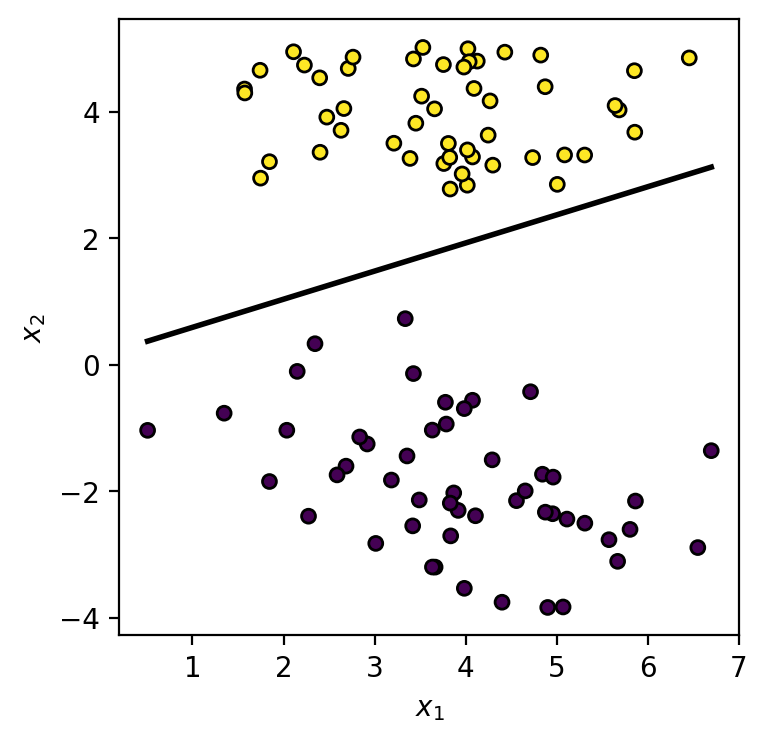

In [34]:
fig, axs = plt.subplots(figsize=(4.,4.), nrows=1, ncols=1, facecolor='white', dpi=200)
axs.scatter(X[:, 0], X[:, 1], marker="o", c=labels, s=25, edgecolor="k")
axs.plot(plot_xs, (-(plot_xs * clf.coef_[0, 0]) - clf.intercept_[0]) / clf.coef_[0, 1], color='k', linewidth=2)
axs.set_xlabel('$x_1$')
axs.set_ylabel('$x_2$')

# Data Collected from Red and White Wines

In [35]:
# import some more packages
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

Our wine data has the following variables:

----

1. **fixed acidity**: Most acids in wine are "fixed" or nonvolatile (do not evaporate readily).
2. **volatile acidity**: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. **citric acid**: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
4. **residual sugar**: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.
5. **chlorides**: The amount of salt in the wine.
6. **free sulfur dioxide**: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.
7. **quality**: based on sensory data, score between 0 and 10.
8. **density**: The density of water is close to that of water depending on the percent alcohol and sugar content.
9. **pH**: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.
10. **sulphates**: A wine preservative which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.
11. **alcohol**: The percent alcohol content of the wine.
12. **total sulfur dioxide**: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

----

### Which variable should be our ***response***, with the rest being ***features***? Sometimes it's not obvious and depends on your interests!

Load data into a Pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using the `read_csv()` function, which can read a table on your computer are directly from a URL!.

In [36]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# these data are in text tables in which the separation of columns is indicated with a semicolon ";"
red_df = pd.read_csv(url_red, sep=";")
white_df = pd.read_csv(url_white, sep=";")

Let's do some brief exploratory data analysis to familiarize ourselves with the data.

In [37]:
# DataFrame.head() let's us peek at the first few lines of our data table
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
# get more info about our DataFrame: data types and missing data!
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


What does the full distribution of each feature look like?


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

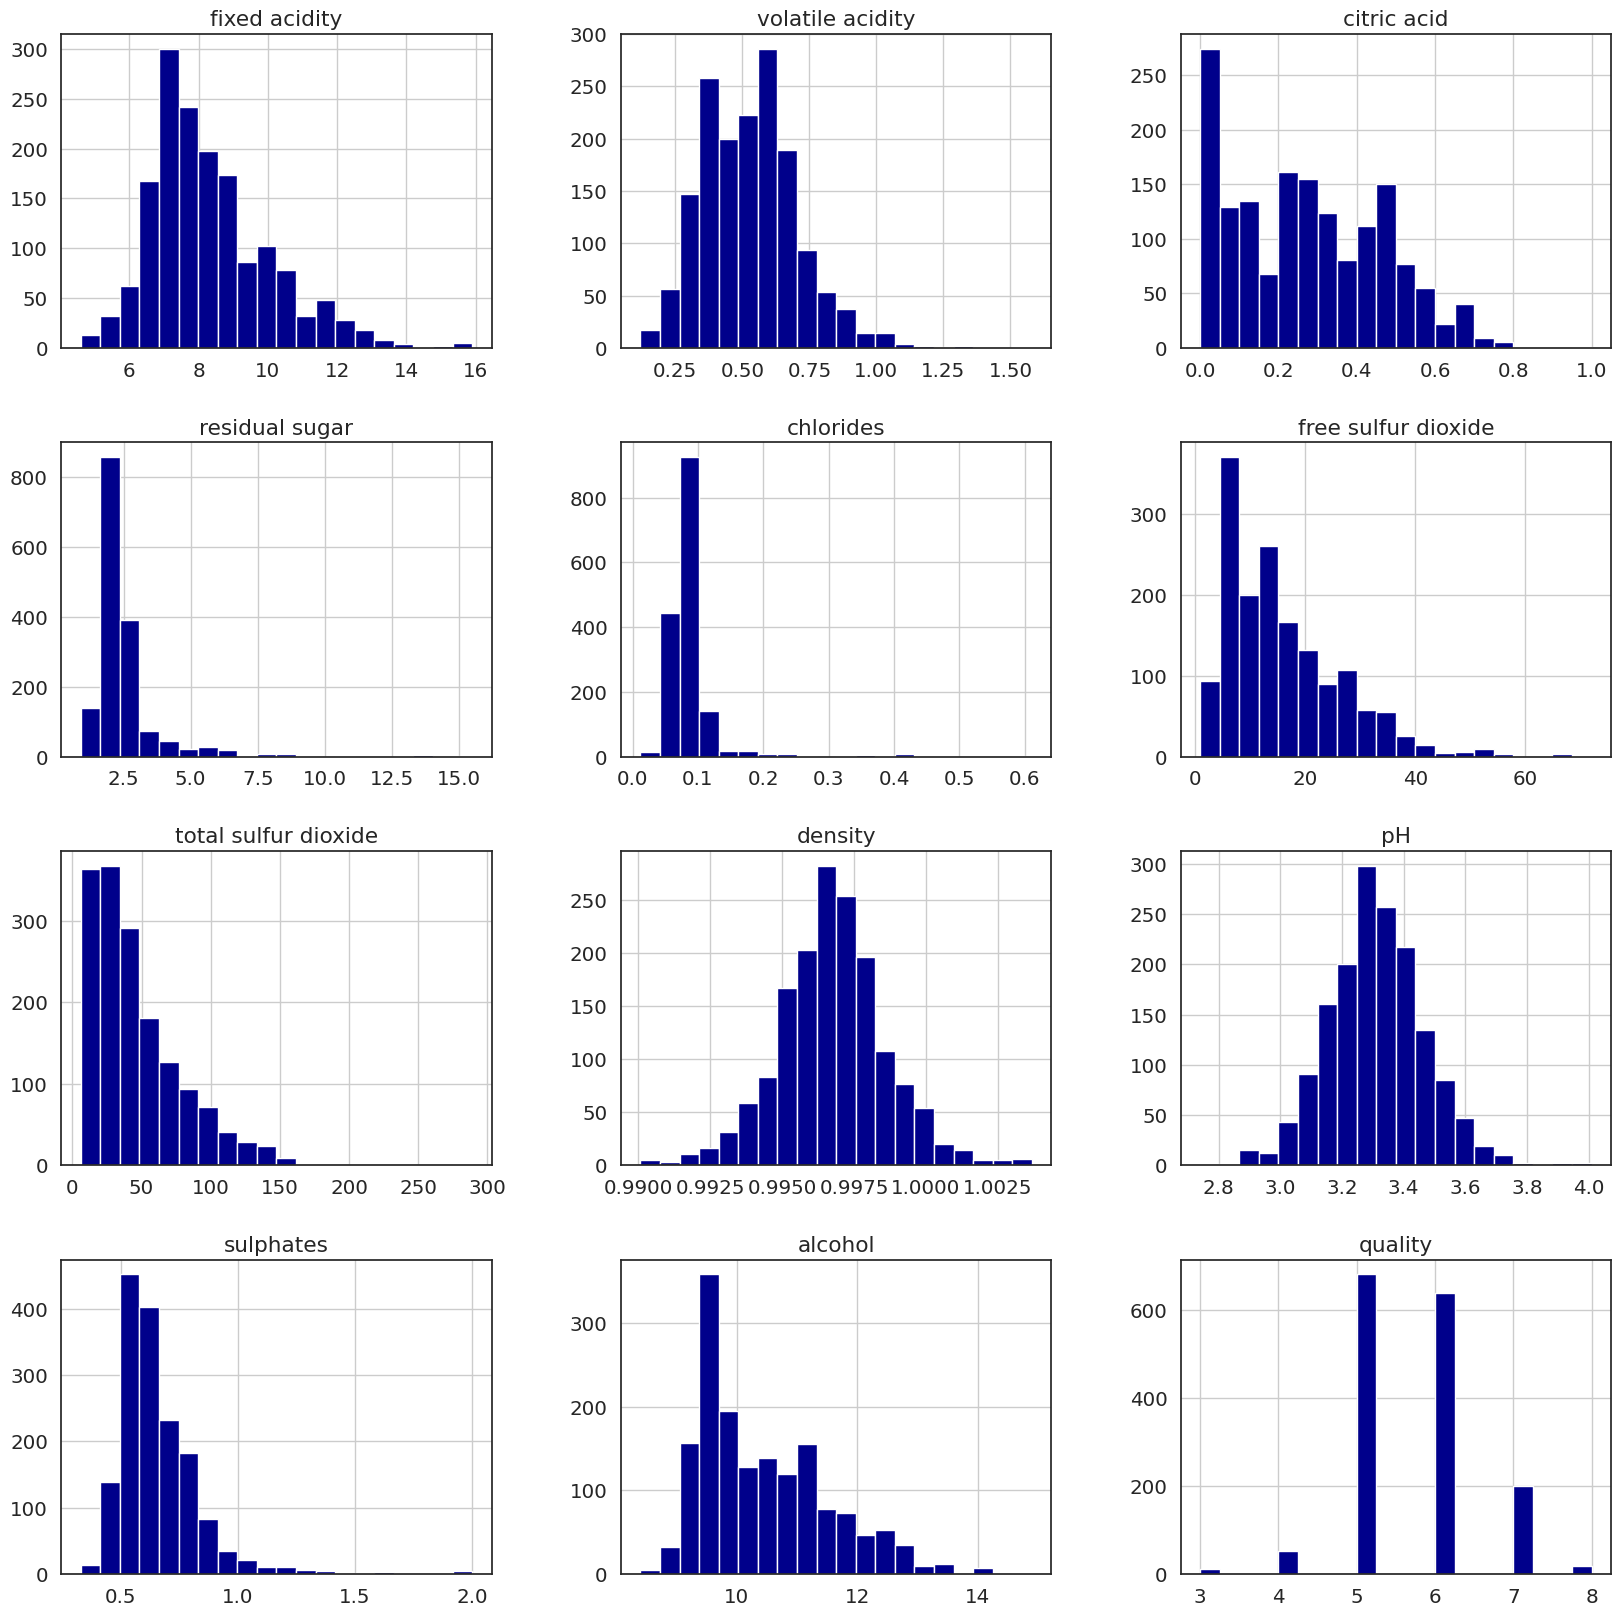

In [39]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})

# as histogram
red_df.hist(bins=20,color='darkblue')

# as boxplot
# red_df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, color='darkblue')

### What about these measurements, if anything, stands out?

In [40]:
# check how many high/low quality wines there actually are
red_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# K-Nearest Neighbors (KNN) regression

In practice we should think about our features more, but let's press forward and build a ML model to predict **quality**!

Later, we'll step back and think about how we can improve the model, and in the process demonstrate common best practices in ML and show how they *actually* make a difference in model performance.

These best practices apply to many other ML methods such as neural networks, but we'll use KNN to demonstrate.

We've decided what our features and response are, let's create renamed data tables storing these variables to make life easier.

In [41]:
response = red_df['quality']
features = red_df.drop(['quality'], axis=1)

## Split data into training/testing subsets

Let's use 70% of the data for training and 30% for testing, using `train_test_split` function (detailed description [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In the context of KNN on these wine data: we'll use 70% of our data to make **quality** predictions about the other 30% that we held out.

That is, for each sample in our test data, we'll find it's nearest neighbors in the training data and use these to make a prediction.

We can then compare these predictions to the true values to assess performance!


In [42]:
# Here we will split our features (X) and response (Y) data into 2 categories each: _train and _test
# We change names to X and Y as this is common in scikit learn tutorials and makes code shorter

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.30, random_state=11)
print("X_train dimensions ", X_train.shape)
print("X_test dimensions ", X_test.shape)

X_train dimensions  (1119, 11)
X_test dimensions  (480, 11)


Our data are ready for modeling.

We'll first 'initialize' our KNN regression model by specifying some parameters. We have to make some choices:
1. How many neighbors (*K*) should we use for regression?
2. Of the *K* nearest neighbors, should ones further away be treated the same as those nearby?
  - `uniform`: all neighbors equal
  - `distance`: weight neighbors by inverse of distance from data point
3. How do we measure distance between data points to calculate "nearness"? Let **d** be a vector of differences between a test sample and training sample, one element for each feature
  - `l1`: L1 norm (Manhattan distance), $\sum_{i=1}^{n} |d_i|$
  - `l2`: L2 norm (Euclidean distance), $\sqrt{\sum_{i=1}^{n} d_{i}^2}$


### How would you decide which options to use?

In [43]:
# Initialize kNN; here you could e.g. use one of scikit learn's neural networks
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", metric='l2')

Now we can give our model the training data.

In [44]:
# Give our KNN model the training data for model fitting
knn.fit(X_train, Y_train)

KNeighborsRegressor(metric='l2', n_neighbors=3)

Let's use this model to make predictions with our test data using the `.predict()` function and compare these with the true values. We will store all this information in another DataFrame and to analyze how we did.

In [45]:
# predict values from the test set, create a DataFrame
predictions =  knn.predict(X_test)
results = pd.DataFrame.from_dict({"truth" : Y_test, "prediction" : predictions})

results.head()

,truth,prediction
1429,5,6.000000
260,5,5.333333
916,5,5.000000
1141,6,5.333333
1574,6,5.333333


### Using this table, briefly examine how we did.

Compute the mean absolute value of the differences between the truth and prediction columns. You can use the following functions:
- abs()
- np.mean()

[Text(0.5, 0, 'true value'),
 Text(0, 0.5, 'predicted values'),
 Text(0.5, 1.0, '')]

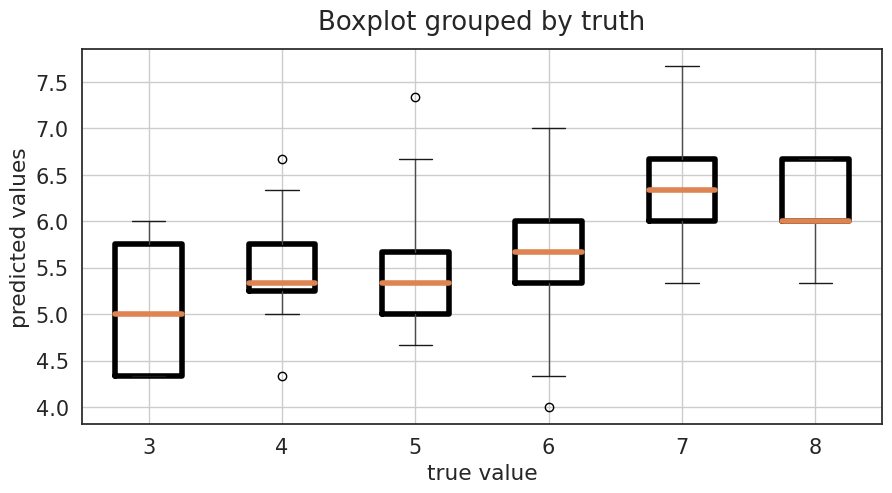

In [46]:
# detailed plot of regression performance

# set some variables for creating a plot
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,5)})
p = results.boxplot(column="prediction", by="truth", fontsize=15,
                boxprops=dict(linestyle='-', linewidth=4),
                medianprops=dict(linestyle='-', linewidth=4))
p.set(xlabel="true value", ylabel="predicted values", title="")


## Evaluate model

Scikit-learn has a function to calculate an overall model [`score`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score:~:text=of%20the%20prediction.-,The%20coefficient%20of%20determination,score%20of%200.0.,-Parameters%3A) called the **coefficient of determination**:

$\huge R = 1-\frac{\sum_{i} (y_i - \hat{y}_i)^2}{\sum_{i} (y_i - \bar{y})^2}$


The part on the right divides the sum of squared differences between our predictions ($\hat{y}_i$) and true values ($y_i$) by the sum of squared differences between true values ($y_i$) and the overall mean ($\bar{y}_i$). This is like comparing our 'fancy' predictions with the simplest predictor possible: assign every new sample the mean value.

So, this score essentially compares by well we do relative to just using the mean.

**1 is good, 0 is bad**.

In [47]:
# score() returns the coefficient of determination of the prediction
# note that our knn object has the training data already stored within it, so we only give it the test data here
print(knn.score(X_test, Y_test))

# or by hand, to show how it's calculated
RSS = ((Y_test - knn.predict(X_test))** 2).sum()
TSS = ((Y_test - Y_test.mean()) ** 2).sum()
print(1-(RSS/TSS))

0.13110666245214742
0.13110666245214742


At least it's not zero?

This score was for a single parameterization of the KNN model. We can try other parameterizations as mentioned above:

1. different *K* values (number of neighbors)
2. different weight functions (`uniform` or `distance`)
3. different distance metrics (`l1` or `l2`)

Experiment with some other parameters using the cell below which re-trains and re-scores the model. Do other values make a difference? What's the highest value you observe?

In [48]:
# Initialize, fit, predict
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", metric='l2')
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))


0.13110666245214742


We will tune our model by finding the combination of parameter values that gives us the highest score!

To automate this model tuning, let's put this code for model fitting and scoring into a single function `get_scores` which we can give a list of *K* values, a weighting function, and a distance function.

This function will then return a list of scores, one for each value of *K*.

In [49]:
def get_scores(x_train,
                x_test,
                y_train,
                y_test,
                k_values,
                weight_function,
                distance_metric):
    """
    input:
        k_values: a list of K nearest neighbors to use
        w: the weight function to use
        m: the distance metric to use
    output:
        a list of scores, one for each set of parameter values
    """

    test_scores = []    # a list that will eventually contain all the model scores
    for k in k_values:
        # initialize
        knn = KNeighborsRegressor(n_neighbors=k, weights=weight_function, metric=distance_metric)
        # train model
        knn.fit(x_train, y_train)
        # score/test model
        test_scores.append(knn.score(x_test, y_test))
    return test_scores


Let's give `get_scores` a list of *K* values from 1 to 100.

While we're at it, let's also compare the `uniform` and `distance` weighting functions.

Thus, we will train and test 200 KNN models!

Best uniform score:  0.15832543111017439
Best distance score:  0.3286037746152555


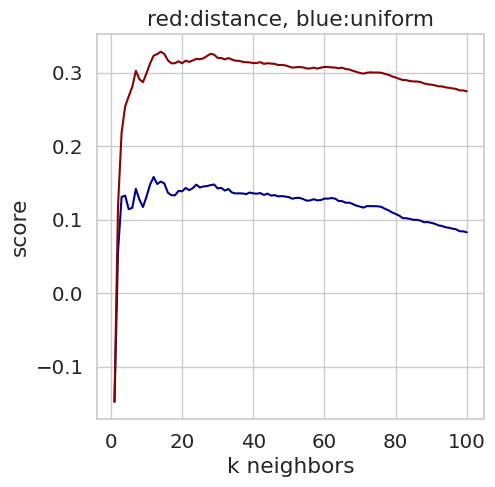

In [50]:
k_values = [i for i in range(1,101)]    # a list containing values 1 through 100

scores_uniform = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "uniform", distance_metric = "l2")
scores_distance = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")

# plot results
sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_uniform, color='darkblue')
sns.lineplot(x=k_values, y=scores_distance, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:distance, blue:uniform")

print("Best uniform score: ", max(scores_uniform))
print("Best distance score: ", max(scores_distance))



Let's use "distance" for the **weights** parameter.

What about for the **metric** parameter? Use code from the cell above, and instead of varying the weight function, vary the distance metric to test out the L1 norm `l1` and the L2 norm `l2`.

By constantly referring to test scores, we are using the data to make decisions about how to parameterize/configure our KNN model.

---

# Feature selection

The success of KNN depends on the fact that samples that are nearby in feature space also have similar response values, such that we can use these KNN responses for accurate prediction. Stated another way, the values of the features are **correlated** with the reponse values. If this isn't the case, nearby neighbors might have wildly different reponse values, such that 'nearness' in feature space isn't informative for predicting reponse values, leading to inaccurate predictions!

So far we've used all available features to make predictions, but some of these features may be useless.

*At best*, including non-informative features makes our model more complex, less interpretable, more computationally costly to use and maintain (we will measure useless features for future data!). This is particularly problematic
for neural networks, in which adding features can dramatically increase the number of parameters.

*At worst*, non-informative features can ***reduce*** the model performance.

Let's try to select only the more informative features by looking at the **Pearson correlation** between all of our variables.

<Axes: >

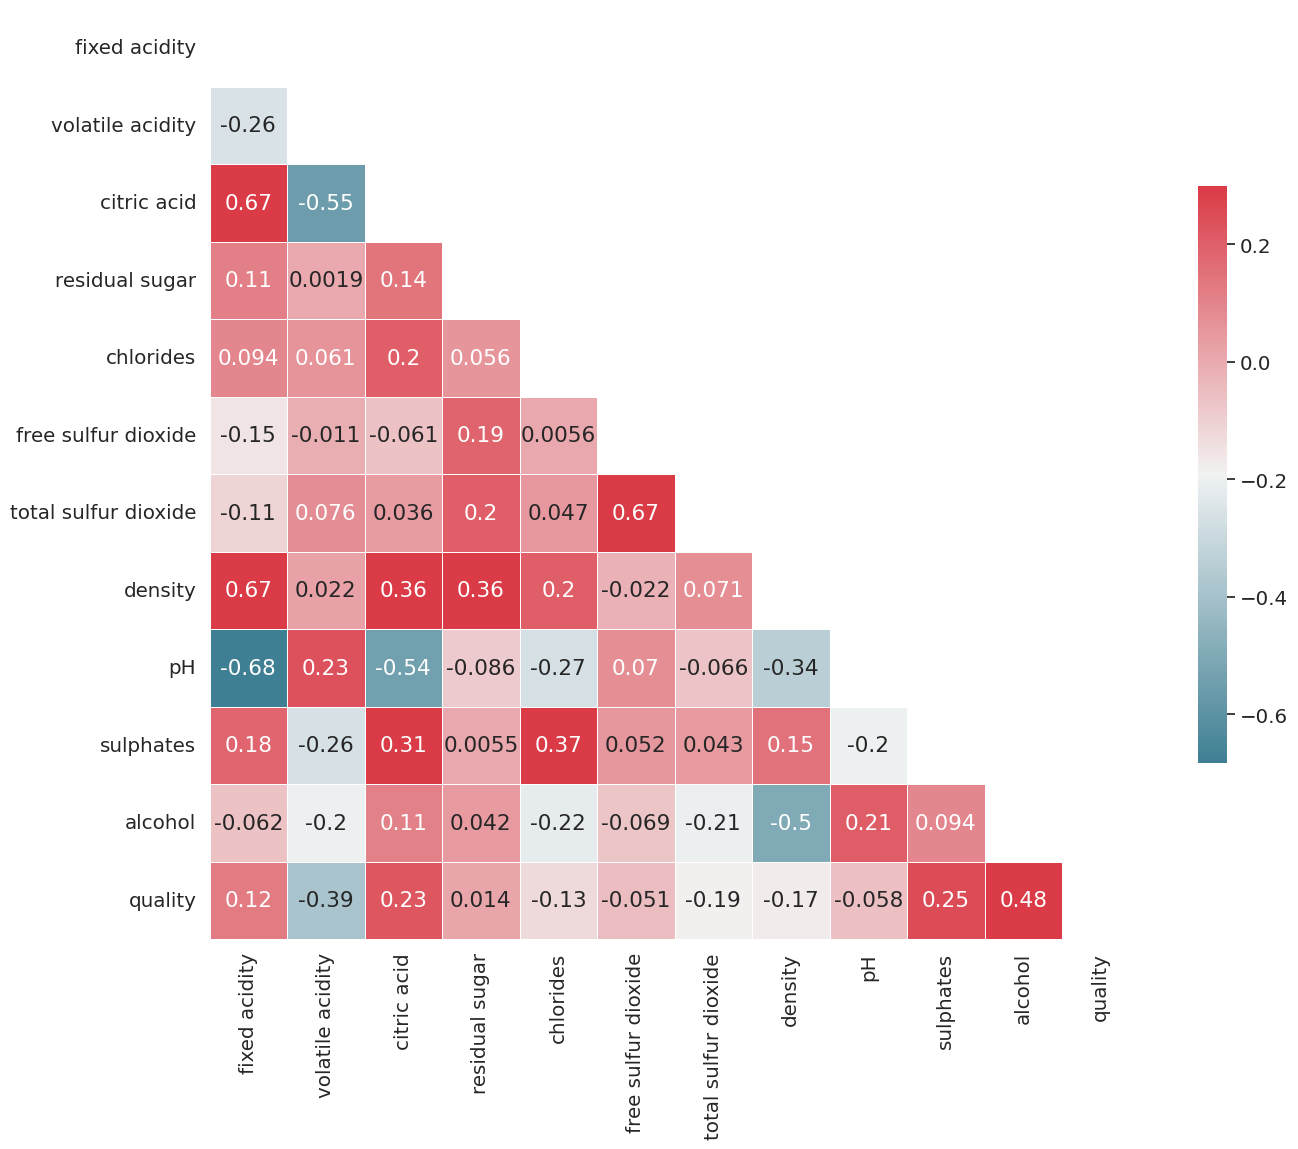

In [51]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,15)})
# calculate pearson correlation between each pair of features
pcorr = red_df.corr(method="pearson")

# matrix is symmetric, upper right half same as lower left half
# not necessary, but for viz purposes let's mask the upper right half
mask = np.zeros_like(pcorr)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pcorr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [52]:
# another way to qaulitatively inspect the relationships between our variables
# warning: this function takes ~30 sec to run!
#sns.pairplot(red_df)

### How should we look at this plot? Which features should we select?
While you ponder this, run the above cell that takes ~30 seconds to compute.

In [53]:
# Select features that have at least a +/- 20% correlation with the response.
# This is an unsophisticated way to conduct feature selection but will do for today!
# Domain expertise of the problem/system is very useful at this stage.

red_df_selection = red_df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality']]


Let's repeat the same analyses above on this new DataFrame with selected features.

Best score:  0.46438326919646


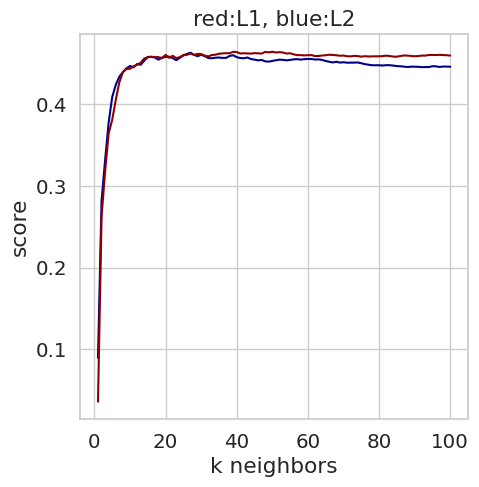

In [54]:
response = red_df_selection['quality']
features = red_df_selection.drop(['quality'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.30, random_state=11)

scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric ="l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric ="l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))

Feature selection makes a difference in overall predictions! Also, it can potentially affect the performance of other parameters (e.g. weight function, distance metric), so feature selection should really be done early on in the ML modeling process, during the exploratory data analysis.

# Feature Normalization

If one feature has a range of values between [0-15] (e.g. alcohol content) and another has a range only between [0-0.5] (e.g. chlorides), then the range of distances between test and training samples will also be different for these two features, such that some features will contribute more or less to the regression/classification model.

This essentially means we aren't using all the data available to us!

We fix this by ***normalizing*** our features such that they are scaled similarly, with similar distributions and ranges.

Let's first use the `DataFrame.describe()` function to get an idea of how the range of each selected feature varies.

In [55]:
features.describe()

,volatile acidity,citric acid,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.658149,10.422983
std,0.179060,0.194801,0.169507,1.065668
min,0.120000,0.000000,0.330000,8.400000
25%,0.390000,0.090000,0.550000,9.500000
50%,0.520000,0.260000,0.620000,10.200000
75%,0.640000,0.420000,0.730000,11.100000
max,1.580000,1.000000,2.000000,14.900000


"Skewed" distributions can have a similar impact on regression/classification, which we can inspect using `DataFrame.skew()`

In [56]:
features.skew()

volatile acidity    0.671593
citric acid         0.318337
sulphates           2.428672
alcohol             0.860829
dtype: float64

To normalize, we'll use the standard Z score such that a feature's value will be transformed as $\Large x' = \frac{(x - \mu)}{\sigma}$.

Another option is the min-max normalization $\Large x' = \frac{x - min(x)}{max(x) - min(x)}$

### Which one do you think we should use?

In [57]:
# Initiate the scaler
scaler = StandardScaler()
# another option
#scaler = MinMaxScaler()

# Fit/transform to all numeric data
features_transformed = scaler.fit_transform(features)

Let's confirm our features have actually been transformed as expected.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

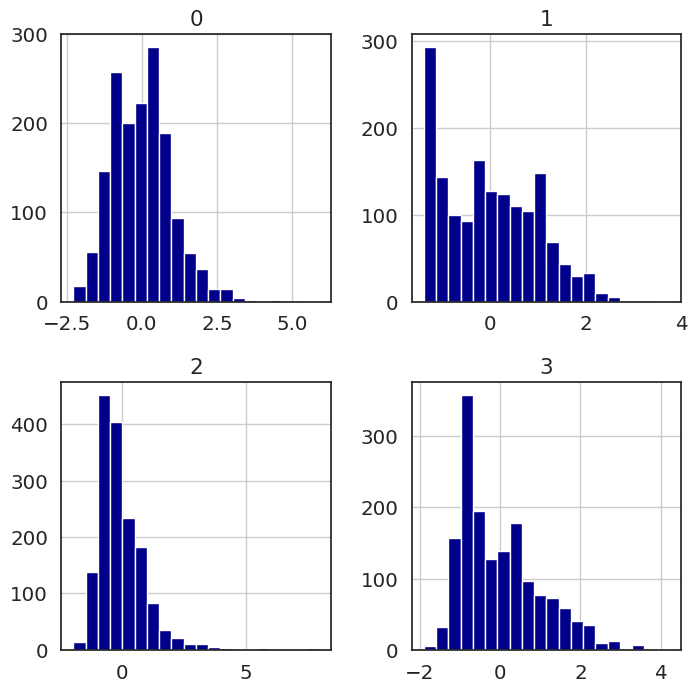

In [58]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(8,8)})
pd.DataFrame(features_transformed).hist(bins=20,color='darkblue' )

Let's rerun the regression with the transformed features to see if it increased scores. This is all the same code, except here we're using the `features_transformed` variable, not `features` as above.

Best score:  0.5007770128016176


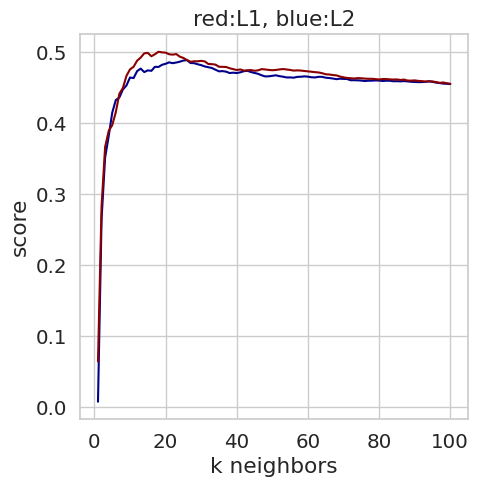

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(features_transformed, response, test_size=0.30, random_state=11)

scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))


We get a score of ~0.5 with the L1 norm and using ~15 neighbors! A pretty nice increase from our initial score of ~0.17 above.

Using code from above, we can again visualize the true and predicted values within the test data.

[Text(0.5, 0, 'true value'),
 Text(0, 0.5, 'predicted values'),
 Text(0.5, 1.0, '')]

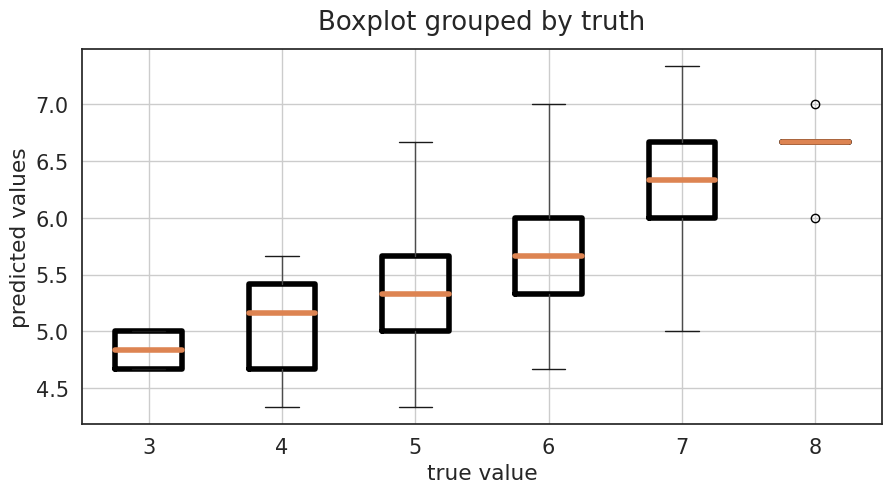

In [60]:
knn.fit(X_train, Y_train)

tmp = pd.DataFrame.from_dict({"truth" : Y_test, "prediction" : knn.predict(X_test)})
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,5)})
p = tmp.boxplot(column="prediction", by="truth", fontsize=15,
                boxprops=dict(linestyle='-', linewidth=4),
                medianprops=dict(linestyle='-', linewidth=4))
p.set(xlabel="true value", ylabel="predicted values", title="")


Looks like we still systematically overestimate values of bad wines and underestimate values of good wines.

----

----

# K-Nearest Neighbors Classification
Let's take our quality scores and convert them to labels to see if we can classify a wine as "poor", "average", or "excellent".

In [61]:
bins = [0, 4, 6, 10]
labels = ["poor", "average", "excellent"]

We will use these numerical boundaries in `bins` to assign 1 of 3 labels to each wine.

In [62]:
# create a new 'quality_label' column by binning 'quality' into three categories
red_df_selection.loc[:,'quality_label'] = pd.cut(red_df_selection['quality'], bins=bins, labels=labels)

# we no longer need the 'quality' column
red_df_selection.drop('quality', axis =1, inplace = True)
red_df_selection.head(n=10)

<ipython-input-62-31e285ca0fd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df_selection.loc[:,'quality_label'] = pd.cut(red_df_selection['quality'], bins=bins, labels=labels)
<ipython-input-62-31e285ca0fd7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_df_selection.drop('quality', axis =1, inplace = True)


,volatile acidity,citric acid,sulphates,alcohol,quality_label
0,0.70,0.00,0.56,9.4,average
1,0.88,0.00,0.68,9.8,average
2,0.76,0.04,0.65,9.8,average
3,0.28,0.56,0.58,9.8,average
4,0.70,0.00,0.56,9.4,average
5,0.66,0.00,0.56,9.4,average
6,0.60,0.06,0.46,9.4,average
7,0.65,0.00,0.47,10.0,excellent
8,0.58,0.02,0.57,9.5,excellent
9,0.50,0.36,0.80,10.5,average


Do any of our features have information about our quality label? Type a feature into the `y=` argument of the `sns.boxplot` function. Options include those in the header we just printed above!

In [64]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(5,5)})
sns.boxplot(x='quality_label',y='', data=red_df_selection)

ValueError: Could not interpret input ''

Here, I'm taking all the code from above and condensing it into one cell to see how classification performance changes with the number of K neighbors used.

We will use scikit-learn's `KNeighborsClassifier` instead of `KNeighborsRegressor`.

Best score:  0.8854166666666666


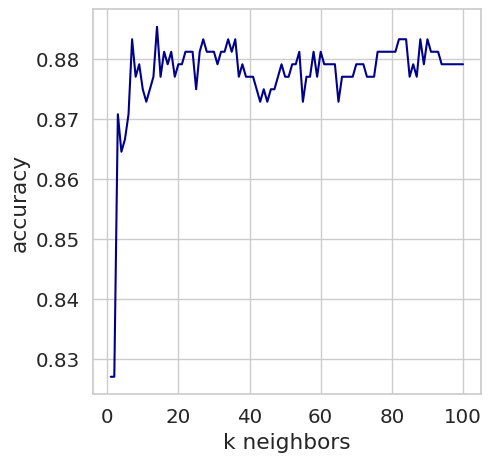

In [65]:
response = red_df_selection['quality_label']
features = red_df_selection.drop(['quality_label'], axis=1)

# feature normalization
scaler = StandardScaler()
features_transformed = scaler.fit_transform(features)

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features_transformed, response, test_size=0.30, random_state=11)

# create function to test the KNN classifier across a range of K values
# note that this uses the 'accuracy_score' for classification, instead of 'score' as used above for regression
# the 'accuracy_score' is simply the fraction of correct predictions
def knn_classification_iterate(x_train, x_test, y_train, y_test, k_values, w, m):
    test_scores = []
    # For each k
    for k in k_values:
        # Initialize, fit, predict
        knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
        knn.fit(x_train, y_train)
        pred_knn = knn.predict(x_test)
        accuracy_score(y_test, pred_knn)
        test_scores.append(accuracy_score(Y_test, pred_knn))
    return test_scores

# Use the above function
# note with KNN we may have ties, i.e. a test sample's 3 nearest neighbors are a poor, average, and excellent wine
# 'breaking' these ties is a bit arbitrary, we will ignore this for now but in practice you should consider this!
scores_l1 = knn_classification_iterate(X_train, X_test, Y_train, Y_test, k_values, w = "distance", m="l1")

# plot accuracy score results
sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l1, color='darkblue')
p.set(xlabel="k neighbors", ylabel="accuracy", title="")

print("Best score: ", max(scores_l1))


Greater than 88% accuracy looks nice!

However, this is a little misleading. For instance, let's revisit the distribution of quality scores in our data set.

In [66]:
red_df_selection['quality_label'].value_counts(normalize=True)
Y_test.value_counts()

average      395
excellent     65
poor          20
Name: quality_label, dtype: int64

**Most** of our wines are 'average', such we could build a model without any features, labelling every single new sample as 'average', and our accuracy would be $\frac{395}{395+65+20} = 0.823$

Our accuracy scores of ~0.88 are certainly better, but this extremely simple approach already get us most of the way there...


Alternatively, say we are very interested in predicting 'excellent' wines and we are concerned about our 'excellent' predictions being accurate. The simple approach would be label each new wine as excellent, which would create a bad model with $\frac{65}{395+65+20} = 0.135$ accuracy. How does the accuracy our our 'excellent' predictions compare to this?

Let's create a [**confusion matrix**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), where rows are the true labels and columns are the predicted labels.

In [67]:
# make a classifier that's optimized according to our results above, with k=18 neighbors
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='l1')
knn.fit(X_train, Y_train)
pred_knn_for_best_k = knn.predict(X_test)

# give confusion_matrix true values and predicted values to make a table
cm = confusion_matrix(Y_test, pred_knn_for_best_k)

# print the matrix
names = ["average", "excellent", "poor"]
print(pd.DataFrame(cm, index=names, columns=names))
# rows are true labels, columns are predicted labels?

           average  excellent  poor
average        383         12     0
excellent       26         39     0
poor            19          0     1


The accuracy we calculated above divides the sum of all the entries in the diagonal of this matrix (true positives) by all entries in the matrix (true positives and false positives).

In [68]:
diagonal = (383+39+1)
all = (383+39+1+12+26+19)

diagonal/all

0.88125

Of our $39+12=51$ excellent predictions (sum of entries in the 'excellent' column), $\frac{39}{51} = 0.76$ are correct, which is much better than ~$13$% from randomly guessing based on the proportion of excellent wines in the training data. Note that we missed 26 'excellent' wines that our classifier throught were 'average'.

These concepts are known as **specificity** and **recall**, and will be covered in more detail later in the workshop.